# Clasificador de piezas de arte

- Curso: INFO257 Inteligencia Artificial
- Profesor: Pablo Huijse 
- Consultas por slack o correo: phuijse at inf dot uach dot cl 

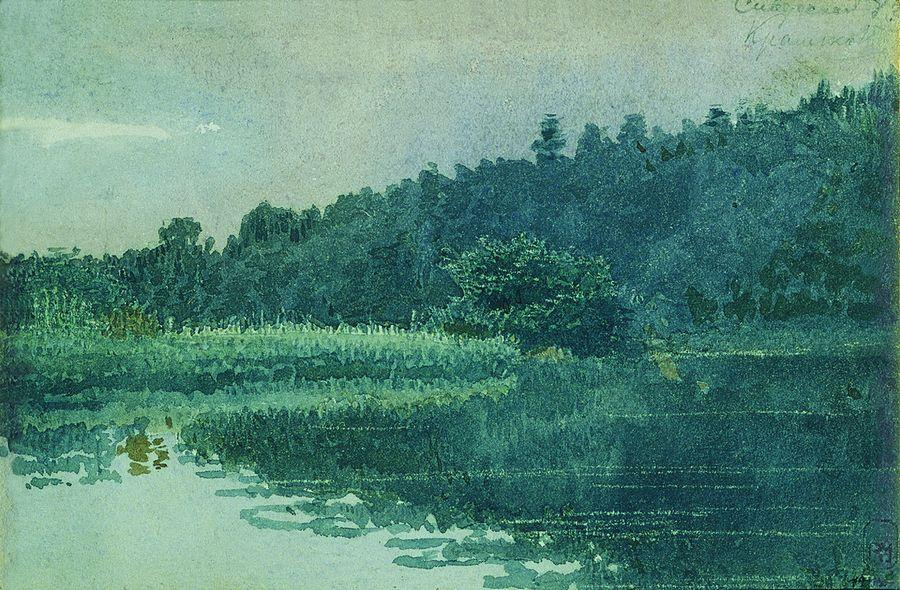

["Siverskaya" del pintor Ivan Kramskoy,1982](https://www.wikiart.org/en/ivan-kramskoy/siverskaya-1883)

## Objetivo

El objetivo de esta actividad es entrenar y evaluar una red neuronal profunda para clasificar automáticamente el estilo de una pintura. Usted entrenará este modelo usando un conjunto de 10,000 imágenes de 10 estilos distintos. Las imágenes fueron obtenidas de la enciclopedia de arte visual [WikiArt.org](https://www.wikiart.org/)



## Datos

Un script para descargar la base de datos wikiart puede encontrarse en el siguiente enlace:

https://drive.google.com/file/d/1PZA71i3i8PiTHTYLb8DQ5uHY7-FCUdUe/view?usp=sharing

Al descomprimir el archivo debería ver dos archivos (se muestran junto a su suma md5)

```bash
3a31054a491a9b6c233154ab575d2f18  download_wikiart.py
68fdc23037dfa90988f1b5d9234a1e7c  wikiart.csv.gz
```

Trasládelo estos archivos a una carpeta de su preferencia y ejecute el script como se muestra a continuación

    python download_wikiart.py -w 4 -i 10000 -s 761218
    
Esto descargará 10.000 imágenes de wikiart usando 4 procesos en una subcarpeta llamada `data/wikiart` y creará las listas `train.txt` y `test.txt` en base a la semilla aleatoria `761218`
    
Se recomienda crear un script de Python que lea los archivos `train.txt` y `test.txt` y organice las imágenes tal que sean compatibles con la clase [`torchvision.datasets.ImageFolder`](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder)

Las etiquetas se entregan como un entero de 0 a 9 cuyo significado es

- 0: [Art Nouveau o Modernismo](https://es.wikipedia.org/wiki/Modernismo_(arte))
- 1: [Barroco](https://es.wikipedia.org/wiki/Barroco)
- 2: [Expresionismo](https://es.wikipedia.org/wiki/Expresionismo)
- 3: [Impresionismo](https://es.wikipedia.org/wiki/Impresionismo)
- 4: [Neoclasicismo](https://es.wikipedia.org/wiki/Neoclasicismo)
- 5: [Posimpresionismoo](https://es.wikipedia.org/wiki/Posimpresionismo)
- 6: [Realismo](https://es.wikipedia.org/wiki/Realismo_art%C3%ADstico)
- 7: [Romanticismo](https://es.wikipedia.org/wiki/Romanticismo)
- 8: [Surrealismo](https://es.wikipedia.org/wiki/Surrealismo)
- 9: [Symbolism](https://es.wikipedia.org/wiki/Simbolismo)

## Instrucciones generales

- Se trabajará en grupos de máximo cuatro estudiantes. Informe los integrantes del grupo a su profesor a la brevedad
- El grupo debe crear un repositorio privado en www.github.com 
- Invite a su profesor como colaborador (usuario: phuijse)
- No suba los datos al repositorio, suba sólo sus códigos fuente y reportes de resultado
- Se evaluará en base al último *commit* del Jueves 22 de Julio de 2021
- [Sean honestos](https://www.acm.org/about-acm/code-of-ethics-in-spanish)


## Instrucciones específicas

En esta tarea ustedes deben seleccionar, entrenar y evaluar un modelo profundo para resolver el problema anteriormente presentado

1. Seleccione un modelo del módulo [`torchvision.models`](https://pytorch.org/docs/stable/torchvision/models.html) y descríbalo en detalle. Se recomienda revisar las publicaciones asociadas
1. Use el modelo seleccionado pre-entrenado en ImageNet como extractor de características 
1. Utilice un esquema de tipo *transfer learning* para entrenar el modelo en WikiArt 

Indicaciones

- Separe las imágenes indicadas en `train.txt` en dos subconjuntos para ajustar los parámetros (entrenamiento) y evitar sobreajuste (validación), respectivamente. Use las imágenes indicadas en `test.txt` como conjunto de prueba
- Normalice el color de las imágenes según lo esperado por el extractor de características y transfórmelas de modo tal que el modelo reciba imágenes de 224x224. Reescale y recorte las imágenes pero no modifique la razón de aspecto
- Utilice *early stopping*, decida experimentalmente la paciencia y el número de épocas de entrenamiento
- Proponga una nueva cabeza clasificadora para el modelo seleccionado y realice experimentos para decidir cuáles/cuántas capas congelar del extractor de características 
- Implemente un esquema de aumentación aleatoria de datos para el conjunto de entrenamiento, considere al menos recortes aleatorios. Compare contra la opción de no realizar aumentación aleatoria
- Compare sus modelos y entrenamientos en base a las curvas de aprendizaje y acompañe sus figuras con observaciones 
- Evalue la capacidad de generalización de su mejor modelo midiendo su rendimiento en el subconjunto de prueba. Utilice matrices de confusión y reportes de clasificación (precisión, recall y *f1-score*). ¿Cuáles clases son más difíciles de clasificar? ¿Cuáles clases tienden a confudirse entre sí?
- Reporte el proceso, justifique sus decisiones y discuta sus resultados